<a href="https://colab.research.google.com/github/meleerosa/data_science_practice/blob/main/%EC%A0%9C%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <0. 필요 패키지 설치하기>

In [1]:
!pip install keras==2.1.6
!pip install tensorflow-gpu==1.15
!pip install matplotlib
!pip install -U scikit-learn
!pip install pandas

     |████████████████████████████████| 339 kB 5.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.1.6 which is incompatible.
     |████████████████████████████████| 411.5 MB 7.3 kB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 503 kB 57.0 MB/s 
     |████████████████████████████████| 3.8 MB 58.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8c32c6885fa1cefa0f4fadfa3ec44ea1078613199671908b45620f2ad4160668
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting unin

# <1-1. 필요 라이브러리 불러오기>

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# import function libraries
import numpy as np
import keras
import os, sys ,math, copy
import scipy.io as sio
import tensorflow as tf
from keras.models import Model, Sequential
from keras.engine import Layer, InputSpec
from keras.optimizers import RMSprop, SGD, Adam
from keras import initializers, regularizers, constraints
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, History
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras import backend as K
from keras.utils import np_utils

sys.setrecursionlimit(10000)

import matplotlib.pyplot as plt

Using TensorFlow backend.


# <1-2. 데이터 불러오기>

In [5]:
# 파일 경로 확인!
# train.csv 파일은 현재 실행한 CNC_network.ipynb 파일과 같은 폴더에 저장되어야 함
# 개별 생산 단위 데이터 파일 경로 설정
# CNC Virtual Data set _v2 폴더의 파일 경로 복사하여 path 의 ' '안에 붙여넣기

train_sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/train.csv", header=0, encoding='utf-8')
path = r'/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2'
all_files = glob.glob(path + "/*.csv")

# count the number of pass/fail items

train_sample_np = np.array(train_sample.copy())


# load csv file
li_df = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)    
    li_df.append(df)

# <2-1. 데이터 종류 확인>

In [6]:
train_sample

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [7]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,176.0,10.0500,57.000,176.0,10.00,4.00,-0.620,0.0194,327,0.709,-1.030000e-06,135.50,4.0125,10.250,135.50,4.00,4.0,-0.5610,0.0175,326,1.400,-0.000001,77.85,4.0125,10.250,77.85,4.0,4.0,0,0,0,0,119.0,30.649500,-10.400,119.0,30.65,4.0,0.444,2.760000e-19,327,0.0,1.720000e-06,16,1,2,6,Prep
1,176.5,9.9500,-46.000,176.5,10.00,4.00,-0.779,0.0198,328,1.040,2.280000e-06,135.50,4.0125,10.250,135.50,4.00,4.0,0.1590,0.0156,326,0.144,-0.000001,77.85,3.9875,0.875,77.85,4.0,4.0,0,0,0,0,124.0,30.650500,8.560,124.0,30.65,4.0,-0.400,2.760000e-19,328,0.0,5.770000e-07,16,1,0,6,Prep
2,177.0,10.1500,54.000,177.0,10.00,4.00,0.979,0.0192,327,2.620,1.150000e-06,135.50,3.9875,0.875,135.50,4.00,4.0,-0.5100,0.0277,326,2.180,0.000002,77.85,3.9875,0.875,77.85,4.0,4.0,0,0,0,0,124.0,30.700000,12.025,124.0,30.65,4.0,0.267,2.760000e-19,327,0.0,-3.780000e-07,16,1,0,6,Prep
3,177.5,9.9625,-30.350,177.5,10.00,4.00,-0.779,0.0179,327,1.840,0.000000e+00,135.50,4.0000,4.000,135.50,4.00,4.0,0.0251,0.0250,326,0.642,0.000003,77.85,3.9875,-2.250,77.85,4.0,4.0,0,0,0,0,129.0,30.650500,-23.400,129.0,30.65,4.0,0.443,2.760000e-19,327,0.0,0.000000e+00,16,1,0,6,Prep
4,178.5,9.8375,-77.250,178.5,10.00,4.00,-1.260,0.0164,328,1.350,2.560000e-07,135.50,4.0000,7.125,135.50,4.00,4.0,-0.0582,0.0166,327,1.580,0.000000,77.85,3.9875,4.000,77.85,4.0,4.0,0,0,0,0,129.0,30.599125,-16.069,129.0,30.65,4.0,0.865,2.760000e-19,327,0.0,-4.070000e-06,16,1,0,6,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,154.0,9.9000,19.650,154.0,9.95,6.92,0.555,0.0226,327,2.220,-1.150000e-06,102.35,2.9500,4.000,102.35,3.07,21.9,-1.0200,0.0255,326,2.350,-0.000002,55.20,28.9375,-5.375,55.40,29.0,4.0,0,0,0,0,384.0,30.650875,-0.466,384.0,30.65,4.0,-0.332,2.770000e-19,326,0.0,0.000000e+00,16,1,0,50,End
458,154.5,9.6500,22.750,154.5,10.00,4.00,1.670,0.0268,327,3.000,0.000000e+00,102.30,3.9875,-2.250,102.30,4.00,4.0,-0.2540,0.0228,325,3.800,-0.000004,57.70,29.0000,16.500,57.90,29.0,4.0,0,0,0,0,389.0,30.750500,32.775,389.0,30.65,4.0,-0.518,2.770000e-19,326,0.0,0.000000e+00,16,1,0,50,End
459,155.0,9.8750,-64.600,155.0,10.00,4.00,0.544,0.0274,327,1.510,0.000000e+00,102.30,4.0500,29.000,102.30,4.00,4.0,-1.5300,0.0193,325,1.370,-0.000006,60.15,28.9500,13.400,60.40,29.0,4.0,0,0,0,0,389.0,30.700500,17.300,389.0,30.65,4.0,-1.000,2.770000e-19,327,0.0,-2.050000e-06,16,1,0,50,End
460,155.5,9.9500,-52.125,155.5,10.00,4.00,1.100,0.0275,327,1.900,0.000000e+00,102.30,3.9625,-11.650,102.30,4.00,4.0,-0.0891,0.0169,325,3.720,0.000005,62.70,29.0625,25.875,62.90,29.0,4.0,0,0,0,0,394.0,30.649125,2.686,394.0,30.65,4.0,-0.221,2.770000e-19,326,0.0,1.930000e-06,16,1,0,50,End


In [8]:
# path에 있는 25개의 개별 생산 단위 데이터 파일의 경로 확인
print(all_files)

['/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_10.csv', '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_11.csv', '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_08.csv', '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_02.csv', '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_05.csv', '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_13.csv', '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_17.csv', '/content/drive/MyD

# <2-2 데이터 개수 확인>

In [9]:
# count the number of pass/fail items
nb_pass = 0
nb_pass_half = 0
nb_defective = 0
for i in range(len(train_sample_np)):
    if train_sample_np[i,5] == 'no':
        nb_defective += 1
    if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] =='yes':
        nb_pass += 1
    if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] == 'no':
        nb_pass_half += 1
        
print('양품 샘플 개수 : ', nb_pass)
print('공정 마쳤으나 육안검사 통과 못한 샘플 개수 : ', nb_pass_half)
print('공정 중지된 샘플 개수 : ', nb_defective)
print('전체 샘플 개수 : ', nb_pass + nb_pass_half + nb_defective)

양품 샘플 개수 :  13
공정 마쳤으나 육안검사 통과 못한 샘플 개수 :  6
공정 중지된 샘플 개수 :  6
전체 샘플 개수 :  25


# < 3-1. 사용자 정의 함수 선언 >

In [10]:
def tool_condition(input):
    for i in range(len(input)):
        if input[i,4] == 'unworn':
            input[i,4] = 0
        else:
            input[i,4] = 1
    return input

def item_inspection(input):
    for i in range(len(input)):
        if input[i,5] == 'no':
            input[i,6] = 2
        elif input[i,5] == 'yes' and input[i,6] == 'no':
            input[i,6] = 1
        elif input[i,5] == 'yes' and input[i,6] == 'yes':
            input[i,6] = 0
    return input


def machining_process(input):
    for i in range(len(input)):
        if input[i,47] == 'Prep':
            input[i,47] = 0
        elif input[i,47] == 'Layer 1 Up':
            input[i,47] = 1
        elif input[i,47] == 'Layer 1 Down':
            input[i,47] = 2
        elif input[i,47] == 'Layer 2 Up':
            input[i,47] = 3
        elif input[i,47] == 'Layer 2 Down':
            input[i,47] = 4
        elif input[i,47] == 'Layer 3 Up':
            input[i,47] = 5
        elif input[i,47] == 'Layer 3 Down':
            input[i,47] = 6
        elif input[i,47] == 'Repositioning':
            input[i,47] = 7
        elif input[i,47] == 'End' or 'end':
            input[i,47] = 8        
        elif input[i,47] == 'Starting':
            input[i,47] = 9
    return input


# <3-2. 사용자 정의 함수의 사용을 통한 데이터 분류>

In [11]:
# Modifying train.csv for training, 
# - [tool_condition]  : unworn/worn -> 0 / 1 
# - [item_inspection] : machining_finalized & passed -> yes & yes / yes & no / no : 0 / 1 / 2
# - delete 'material' column and 'No' column

train_sample_info = np.array(train_sample_np.copy())
train_sample_info = tool_condition(train_sample_info)
train_sample_info = item_inspection(train_sample_info)
print(train_sample_info)


#[feedrate  clamp_pressure  unworn/worn  label]

[[1 'aluminum' 6 4.0 0 'yes' 0]
 [2 'aluminum' 20 4.0 0 'yes' 0]
 [3 'aluminum' 6 3.0 0 'yes' 0]
 [4 'aluminum' 6 2.5 0 'no' 2]
 [5 'aluminum' 20 3.0 0 'no' 2]
 [6 'aluminum' 6 4.0 1 'yes' 1]
 [7 'aluminum' 20 4.0 1 'no' 2]
 [8 'aluminum' 20 4.0 1 'yes' 1]
 [9 'aluminum' 15 4.0 1 'yes' 1]
 [10 'aluminum' 12 4.0 1 'yes' 1]
 [11 'aluminum' 3 4.0 0 'yes' 0]
 [12 'aluminum' 3 3.0 0 'yes' 0]
 [13 'aluminum' 3 4.0 1 'yes' 0]
 [14 'aluminum' 3 3.0 1 'yes' 0]
 [15 'aluminum' 6 3.0 1 'yes' 0]
 [16 'aluminum' 20 3.0 1 'no' 2]
 [17 'aluminum' 3 2.5 0 'yes' 0]
 [18 'aluminum' 3 2.5 1 'yes' 0]
 [19 'aluminum' 15 4.0 1 'yes' 1]
 [20 'aluminum' 12 4.0 0 'no' 2]
 [21 'aluminum' 3 4.0 0 'yes' 1]
 [22 'aluminum' 20 3.0 1 'yes' 0]
 [23 'aluminum' 3 4.0 1 'no' 2]
 [24 'aluminum' 3 3.0 0 'yes' 0]
 [25 'aluminum' 6 2.5 1 'yes' 0]]


In [12]:
train_sample_info = np.delete(train_sample_info,5,1)
train_sample_info = np.delete(train_sample_info,0,1)
train_sample_info = np.delete(train_sample_info,0,1)
print(train_sample_info)

[[6 4.0 0 0]
 [20 4.0 0 0]
 [6 3.0 0 0]
 [6 2.5 0 2]
 [20 3.0 0 2]
 [6 4.0 1 1]
 [20 4.0 1 2]
 [20 4.0 1 1]
 [15 4.0 1 1]
 [12 4.0 1 1]
 [3 4.0 0 0]
 [3 3.0 0 0]
 [3 4.0 1 0]
 [3 3.0 1 0]
 [6 3.0 1 0]
 [20 3.0 1 2]
 [3 2.5 0 0]
 [3 2.5 1 0]
 [15 4.0 1 1]
 [12 4.0 0 2]
 [3 4.0 0 1]
 [20 3.0 1 0]
 [3 4.0 1 2]
 [3 3.0 0 0]
 [6 2.5 1 0]]


In [13]:
all_files.sort()
all_files

['/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_01.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_02.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_03.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_04.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_05.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_06.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_07.csv',
 '/content/dr

In [14]:
k  = 0
li_pass = []
li_pass_half = []
li_fail = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)      
    
    if train_sample_info[k,3] == 0:
        li_pass.append(df)        
    elif train_sample_info[k,3] == 1:
        li_pass_half.append(df)        
    else :
        li_fail.append(df)
        
    k += 1
    
frame01 = pd.concat(li_pass, axis=0, ignore_index=True)
frame02 = pd.concat(li_pass_half, axis=0, ignore_index=True)
frame03 = pd.concat(li_fail, axis=0, ignore_index=True)

data_pass = np.array(frame01.copy())
data_pass_half = np.array(frame02.copy())
data_fail = np.array(frame03.copy())


print('공정완료 및 육안검사 합격한 전체 데이터 수 : ',len(data_pass))
print('공정완료 및 육안검사 불합격한 전체 데이터 수 : ',len(data_pass_half))
print('공정 미완료한 전체 데이터 수 : ',len(data_fail))

공정완료 및 육안검사 합격한 전체 데이터 수 :  22645
공정완료 및 육안검사 불합격한 전체 데이터 수 :  6175
공정 미완료한 전체 데이터 수 :  3228


In [15]:
print(data_pass.shape)
print(data_pass_half.shape)
print(data_fail.shape)

(22645, 48)
(6175, 48)
(3228, 48)


In [16]:
# Modifying experiment data 
#  - machining_process : From "Prep" to "End" -> 0~9
data_pass = machining_process(data_pass)
data_pass_half = machining_process(data_pass_half)
data_fail = machining_process(data_fail)

In [30]:
data_pass

array([[202.0, 4.0, 4.0, ..., 0, 50, 8],
       [202.0, -6.8, -346.0, ..., 4, 50, 0],
       [200.0, -13.8, -2.25, ..., 7, 50, 0],
       ...,
       [178.5, 3.5475, 17.5, ..., 0, 20, 8],
       [178.5, 3.4475, 11.25, ..., 0, 20, 8],
       [178.0, 3.5625, 1.85, ..., 0, 20, 8]], dtype=object)

# <3-3. 데이터셋 구성>

In [17]:
# label 0/1 --> data01 / data02+data03

data01 = data_pass[0:3228+6175,:]
data02 = data_pass_half[0:6175,:]
data03 = data_fail[0:3228,:]

data = np.concatenate((data01,data02),axis=0);
data = np.concatenate((data,data03),axis=0);

data_all= data_pass[3228+6175:22645,:]

In [18]:
print((data))
print(data.shape)
print(data_all.shape)

[[202.0 4.0 4.0 ... 0 50 8]
 [202.0 -6.8 -346.0 ... 4 50 0]
 [200.0 -13.8 -2.25 ... 7 50 0]
 ...
 [155.0 9.875 -64.6 ... 0 50 8]
 [155.5 9.95 -52.125 ... 0 50 8]
 [156.0 10.1 76.125 ... 0 50 8]]
(18806, 48)
(13242, 48)


# <3-4. 데이터 정제 (2차 전처리)>

In [19]:
# 2차 전처리 진행, MinMaxScaler 사용
sc = MinMaxScaler()
X_train = sc.fit_transform(data) 
X_train = np.array(X_train)
X_test = sc.fit_transform(data_all)
X_test = np.array(X_test)

# <4-1. 라벨 데이터 제작>

In [20]:
# 라벨 데이터 생성

Y_train = np.zeros((len(X_train),1),dtype='int')
Y_test = np.zeros((len(X_test),1),dtype='int')
l = int(Y_train.shape[0]/2)

Y_train[0:l,:] = 0
Y_train[l:l*2,:] = 1

print(Y_train)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


# <5-1. 학습/검증/평가 데이터 구성>

In [21]:
# 뒤의 <7-1. AI 모델 훈련> 항목에 포함되어 있음

# <6-1. AI 모델 파라미터 설정>

In [22]:
nb_classes = 2
batch_size = 1024
epochs = 300
lr = 1e-4

# <6-2. 데이터셋 준비>

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18806, 48)
(13242, 48)
(18806, 2)
(13242, 2)


# <6-3. AI 모델 디자인>

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=48))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu')) # 깊이가 깊어서 sigmoid를 쓰면 0에 수렴할 확률이 있기 때문에 relu 활성함수를 사용하는 것
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes, activation='sigmoid')) # 양품 확률 출력하기 위해 확률로 노드1개 -> dense =1 

model_checkpoint = ModelCheckpoint('weight_CNC_binary.mat', monitor='val_acc',save_best_only=True)
opt=Adam(lr)
model.summary()
model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])
history = History()
print('.............................model is defined.............................')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               6272      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_______________________

# <7-1. AI 모델 훈련>

In [25]:
model.fit(X_train, Y_train, verbose=2, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True, callbacks=[history])
model.save_weights('weight_CNC_binary.mat')




Train on 16925 samples, validate on 1881 samples
Epoch 1/300





 - 3s - loss: 0.6896 - acc: 0.5311 - val_loss: 0.7622 - val_acc: 0.0000e+00
Epoch 2/300
 - 2s - loss: 0.6735 - acc: 0.5659 - val_loss: 0.7578 - val_acc: 0.4094
Epoch 3/300
 - 2s - loss: 0.6531 - acc: 0.6061 - val_loss: 0.6837 - val_acc: 0.6701
Epoch 4/300
 - 2s - loss: 0.6300 - acc: 0.6604 - val_loss: 0.6312 - val_acc: 0.7350
Epoch 5/300
 - 2s - loss: 0.6092 - acc: 0.6745 - val_loss: 0.5906 - val_acc: 0.8432
Epoch 6/300
 - 2s - loss: 0.5765 - acc: 0.6941 - val_loss: 0.5188 - val_acc: 0.9009
Epoch 7/300
 - 2s - loss: 0.5461 - acc: 0.7178 - val_loss: 0.4490 - val_acc: 0.9585
Epoch 8/300
 - 2s - loss: 0.5181 - acc: 0.7372 - val_loss: 0.4185 - val_acc: 0.9779
Epoch 9/300
 - 2s - loss: 0.4956 - acc: 0.7536 - val_loss: 0.4276 - val_acc: 0.9702
Epoch 10/300
 - 2s - loss: 0.4743 - acc: 0.7694 - val_loss: 0.3882 - val_acc: 0.9838
Epoch 11/300
 - 2s - loss: 0.4543 - acc: 0.7840 - val_loss: 0.4009 - val_acc: 0.8514
Epoch 12/300


# <8-1. AI 모델 훈련 결과 출력>

In [26]:
loss_and_metrics = model.evaluate(X_train,Y_train,batch_size=32)
print(loss_and_metrics)

18806/18806 [==============================] - 2s 86us/step
[0.2987128681107857, 0.9708603637137084]


In [27]:
loss_and_metrics2 = model.evaluate(X_test,Y_test,batch_size=32)
print(loss_and_metrics2)

13242/13242 [==============================] - 1s 90us/step
[0.8745124724121365, 0.915269596737653]


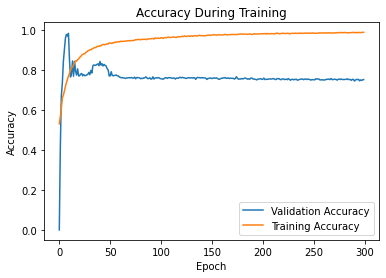

In [28]:
# 해당 코드 실행 시 val_acc 또는 acc에서 오류 발생 시, 각각 val_accuracy 와 accuracy로 바꿔서 실행하도록 한다.
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy'])


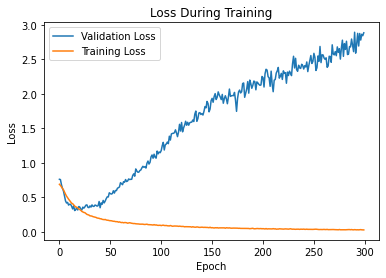

In [29]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation Loss','Training Loss'])
plt.show()